Нужно решить задачу регрессии. В качестве датасета необходимо взять данные о недвижимости Калифорнии из библиотеки [sklearn.datasets](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html). Целевая переменная – MedHouseVal. Прочитать информацию о признаках датасета можно, выполнив следующий код – print(fetch_california_housing().DESCR). На полученных данных построить модель регрессии и дерево решений.


#Этапы работы

1) Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую).

2) Проведите первичный анализ.

  --a. Проверьте данные на пропуски. Удалите в случае обнаружения.

  --b.*Нормализуйте один из признаков.

3) Разделите выборку на обучающее и тестовое подмножества. 80% данных оставить на обучающее множество, 20% - на тестовое.

4) Обучите [модель регрессии](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) на обучающем множестве.

5) Для тестового множества предскажите целевую переменную и сравните с истинным значением, посчитав точность предсказания модели. Для этого используйте встроенную функцию score.

6) Обучите [дерево решений](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) на обучающем множестве.

  --a. Повторите п. 5 для полученной модели.

  --b. Визуализируйте часть дерева решений. Убедитесь, что график получился читабельным. Посмотрите примеры визуализации по [ссылке](https://mljar.com/blog/visualize-decision-tree/).

7) Оптимизируйте глубину дерева (max_depth). *Оптимизируйте ещё один параметр модели на выбор.

--a. Повторите п. 5 для полученной модели.

8) Сформулируйте выводы по проделанной работе.

  --a. Сравните точность двух моделей.

  --b. Напишите свое мнение, для каких задач предпочтительнее использовать обученные в работе модели? Какие у них есть плюсы и минусы?

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeRegressor

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#Загрузка датасета

In [ ]:
from sklearn.datasets import fetch_california_housing

In [ ]:
print(fetch_california_housing().DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [ ]:
df, y = fetch_california_housing(return_X_y=True, as_frame=True)
df['MedHouseVal'] = y # целевая переменная
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


Пропусков в датасете нет

##Нормализация признака в датасете

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df['Population'] = scaler.fit_transform(df['Population'].values.reshape(-1, 1))
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,-0.974429,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,0.861439,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,-0.820777,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,-0.766028,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,-0.759847,2.181467,37.85,-122.25,3.422


#Модель регрессии

Будем использовать линейную регрессию для тестирования качества данных и поделим выборку на обучающую и тестовую 80/20

In [ ]:
X = df[df.columns[:-1]]
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,-0.974429,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,0.861439,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,-0.820777,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,-0.766028,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,-0.759847,2.181467,37.85,-122.25


In [ ]:
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64

##Обучение модели

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Прогнозы на обучающем и тестовом множествах
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [ ]:
model.score(X_train, y_train)

0.6125511913966952

In [ ]:
model.score(X_test, y_test)

0.5757877060324512

#Дерево решений

In [ ]:
Xtree = X[X.columns[:6]]
Xtree.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
0,8.3252,41.0,6.984127,1.023810,-0.974429,2.555556
1,8.3014,21.0,6.238137,0.971880,0.861439,2.109842
2,7.2574,52.0,8.288136,1.073446,-0.820777,2.802260
3,5.6431,52.0,5.817352,1.073059,-0.766028,2.547945
4,3.8462,52.0,6.281853,1.081081,-0.759847,2.181467


##Обучение модели

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(Xtree, y, test_size=0.2, random_state=42)

In [ ]:
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train2, y_train2)

DecisionTreeRegressor(random_state=42)

In [ ]:
y_pred = tree_reg.predict(X_test2)
y_pred

array([0.425  , 0.821  , 5.00001, ..., 5.00001, 1.37   , 1.625  ])

In [ ]:
tree_reg.predict(Xtree)

array([5.00001, 3.585  , 3.521  , ..., 0.923  , 1.042  , 0.894  ])

In [ ]:
tree_reg.score(Xtree, y)

0.8815963410908559

##Визуализация

In [ ]:
from sklearn import tree
from sklearn.tree import plot_tree

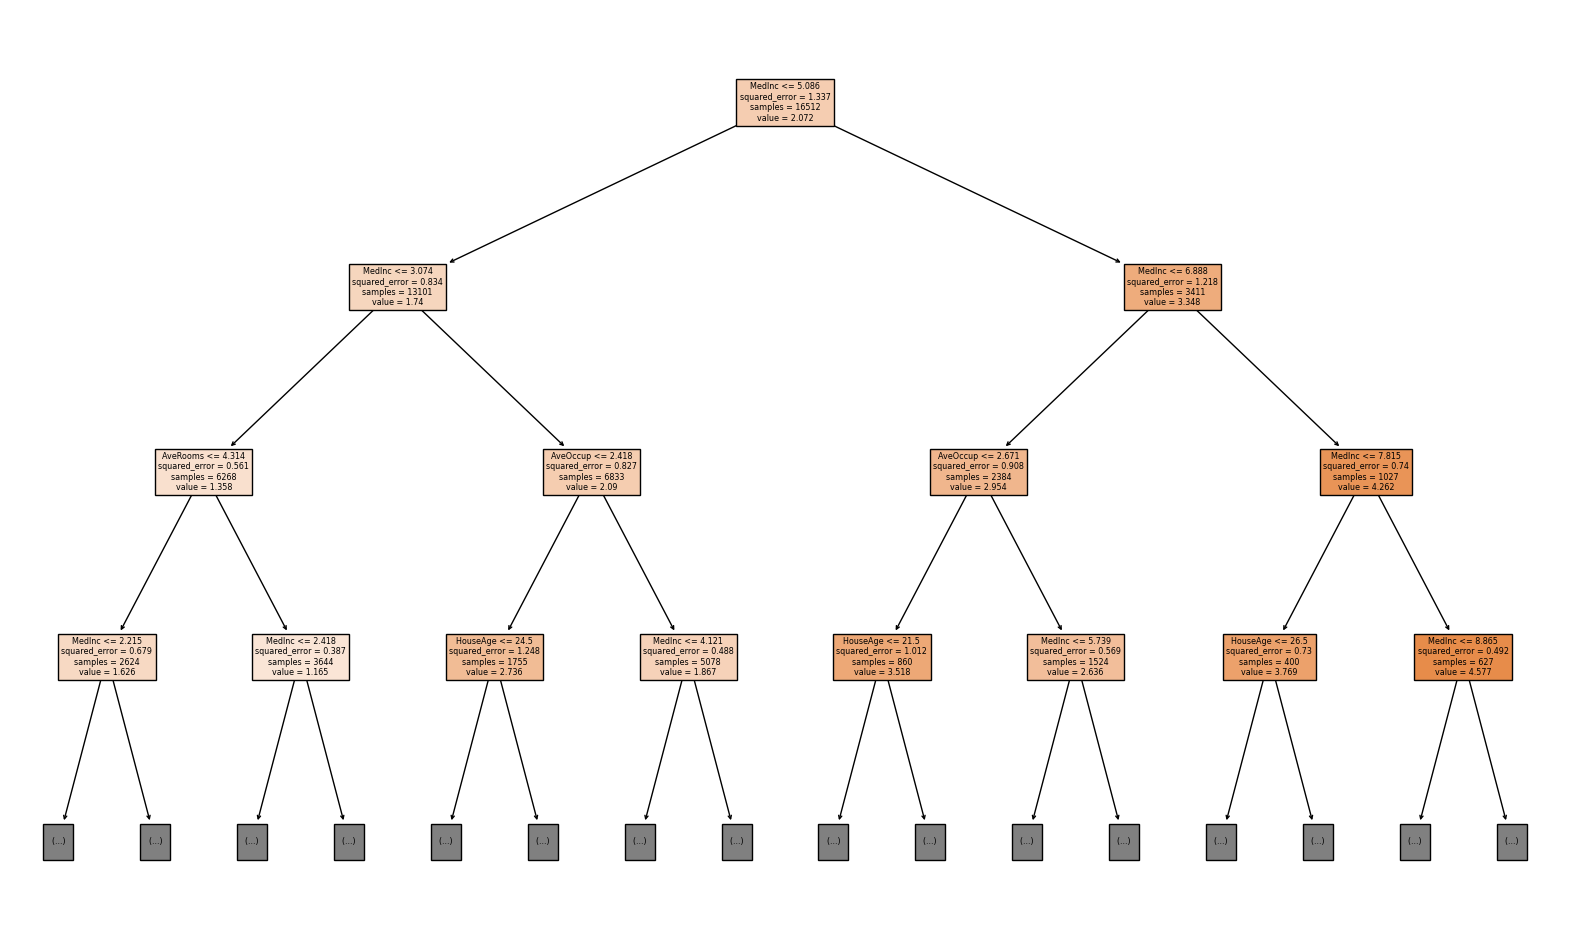

In [ ]:
plt.figure(figsize=(20, 12))
plot_tree(tree_reg, feature_names=Xtree.columns, filled=True, max_depth=3);